In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/Pharmacy/D5.csv', parse_dates=['date'], dayfirst=True)

In [3]:
df.head()

,date,itemname,packunits,expiry,price,looseqty
0,2022-07-01,PANADOL TAB,200,4/25/24,1.70,60
1,2022-07-02,PANADOL TAB,200,4/25/24,1.70,70
2,2022-07-03,PANADOL TAB,200,4/25/24,1.70,55
3,2022-07-05,PANADOL TAB,200,4/25/24,1.45,20
4,2022-07-08,PANADOL TAB,200,4/25/24,1.70,70


In [4]:
df.rename(columns={'date': 'ds', 'looseqty': 'y'}, inplace=True)

In [5]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [6]:
model = Prophet()
model.fit(train)

02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:33 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=len(test))

In [8]:
forecast = model.predict(future)

In [9]:
y_pred = forecast.iloc[-len(test):]['yhat'].values

In [10]:
y_true = test['y'].values

In [11]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log1p(test['y']), np.log1p(y_pred)))

In [12]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 160.64514907950073
Root Mean Squared Logarithmic Error (RMSLE): 0.4014388777975418


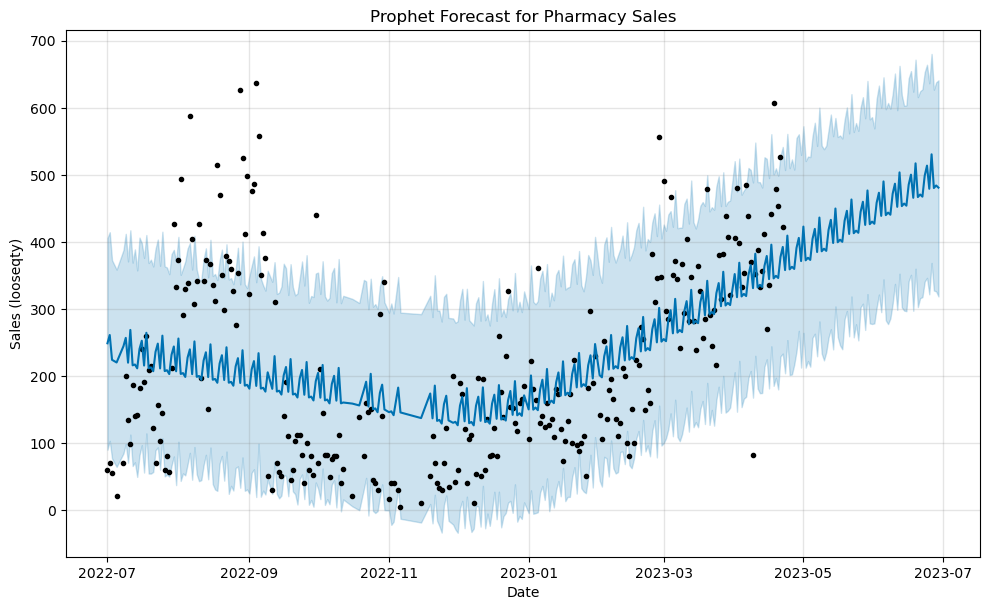

In [13]:
fig = model.plot(forecast)
plt.title('Prophet Forecast for Pharmacy Sales')
plt.xlabel('Date')
plt.ylabel('Sales (looseqty)')
plt.show()